In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy


In [4]:

folder = '/content/drive/MyDrive/anh/do_an/'

img_size = 150;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('banh_cuon'):
    output = 1.0
  if file.startswith('banh_mi'):
    output = 2.0
  if file.startswith('banh_xeo'):
    output = 3.0
  if file.startswith('bun_bo_hue'):
    output = 4.0
  if file.startswith('bun_dau_mam-tom'):
    output = 5.0
  if file.startswith('chao_long'):
    output = 6.0
  if file.startswith('com_tam'):
    output = 7.0
  if file.startswith('goi_cuon'):
    output = 8.0
  if file.startswith('pho'):
    output = 9.0
  if file.startswith('mi_quang'):
    output = 10.0

  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)


(5500, 150, 150, 3) (5500,)


In [5]:
photos = photos.astype('float32')/255.0

print(photos.shape)

(5500, 150, 150, 3)


In [6]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.10, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.11, random_state=10)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)


(4405, 150, 150, 3)
(4405,)
(550, 150, 150, 3)
(550,)
(545, 150, 150, 3)
(545,)


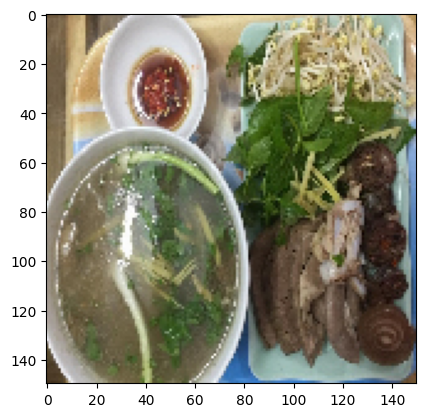

Cái này là:  6.0


In [7]:
image_test=2000
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Cái này là: ', trainY[image_test])


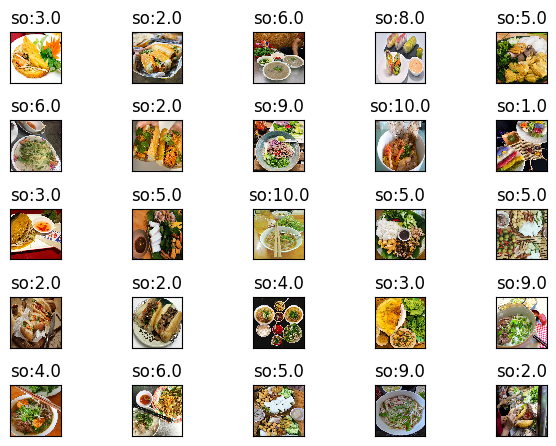

In [8]:

for i in range(25):  # 30 hình ảnh
  plt.subplot(5,5,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])
  

In [9]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(4405, 11)
(550, 11)
(545, 11)


In [10]:

batch_size=128
epochs=20
classes =11

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(64, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
     
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))


model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()
  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 128)      0         
 2D)                                                    

In [ ]:
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))

Epoch 1/20
35/35 [==============================] - 751s 21s/step - loss: 2.2453 - accuracy: 0.1759 - val_loss: 2.0364 - val_accuracy: 0.2991
Epoch 2/20
29/35 [=======================>......] - ETA: 2:07 - loss: 1.8792 - accuracy: 0.3314

In [ ]:
img_size = 150;

In [ ]:
folder = '/content/drive/MyDrive/anh/hoa/'

img_size = 150;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Sen'):
    output = 1.0
  if file.startswith('hoa_sung'):
    output = 2.0
  if file.startswith('hoa_mai'):
    output = 3.0
  if file.startswith('hoa_dao'):
    output = 4.0
  if file.startswith('hoa_hong'):
    output = 5.0
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)

(325, 150, 150, 3) (325,)


In [ ]:
photos = photos.astype('float32')/255.0
# photos_test = photos_test.astype('float32')/255.0

print(photos.shape)
# print(photos_test.shape)

(325, 150, 150, 3)


In [ ]:

(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)


(195, 150, 150, 3)
(195,)
(65, 150, 150, 3)
(65,)
(65, 150, 150, 3)
(65,)


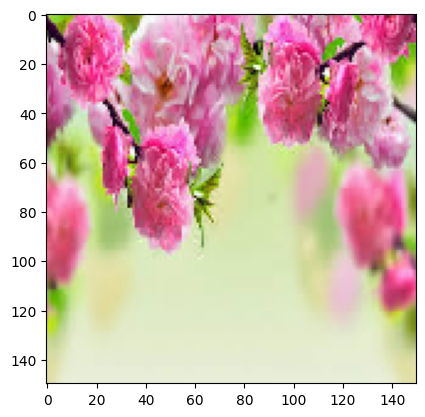

Cái này là:  5.0


In [ ]:
hinh = trainX[50]
plt.imshow(hinh) 
plt.show()  
print('Cái này là: ', trainY[i])
#{1:'Sen', 2:'hoa_sung',3:'hoa_mai',4:'hoa_dao',5:'hoa_hong'}

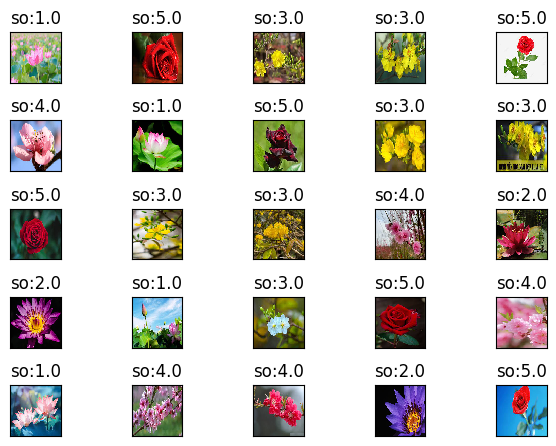

In [ ]:
import matplotlib.pyplot as plt   
for i in range(25):  # 30 hình ảnh
  plt.subplot(5,5,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)

print(trainY.shape)
print(testY.shape)

(195, 6)
(65, 6)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import numpy as np
batch_size=64
epochs=50
classes =6

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
     
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy
model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [ ]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 2.0494e-04 - accuracy: 1.0000

ValueError: ignored

Text(0.5, 0, 'Epoch')

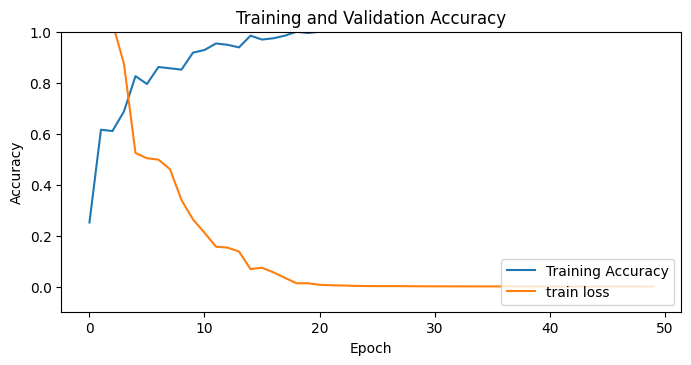

In [ ]:
acc=train.history['accuracy']
loss = train.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='train loss')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

1/1 [==============================] - 0s 96ms/step
Predicted:  hoa_dao


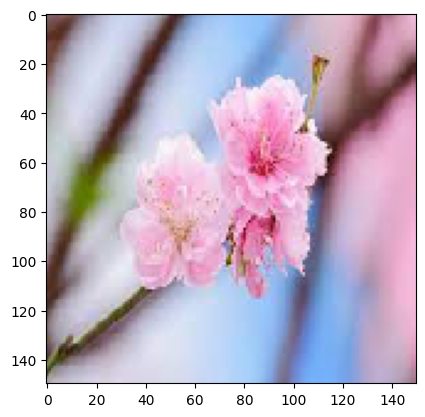

In [ ]:

name={1:'Sen', 2:'hoa_sung',3:'hoa_mai',4:'hoa_dao',5:'hoa_hong'}
#test
import numpy as np
filePath = '/content/drive/MyDrive/anh/hoa/hoa_dao (60).jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)